# Non-linear Credibility

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y,z) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x) p(y|x) p(z|x,y) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s} \frac{p(z|x)}{p(z|x)}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## triangle world

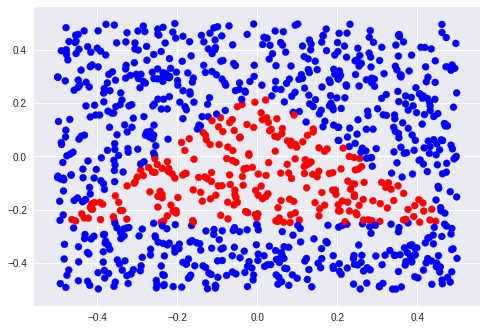

In [105]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns

def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int)

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==0 else 'r', y)))
    plt.show()

X, y = build_triangle(n=1000)
plotData(X, y)